In [1]:
from qiskit.visualization import circuit_drawer
from pathlib import Path
import qiskit
from qiskit_aer import AerSimulator,Aer
from qiskit import QuantumCircuit, transpile
import numpy as np 
import os
from qiskit.primitives import StatevectorSampler
# Load QASM from a file
qasm_folder = Path("/home/vandna/codes/qiskit-aakash/qasm_files/")
qasm_filename = list(qasm_folder.glob("*.qasm")) #using glob to get a list of files.
print(qasm_filename)

[PosixPath('/home/vandna/codes/qiskit-aakash/qasm_files/dj_indep_qiskit_10.qasm'), PosixPath('/home/vandna/codes/qiskit-aakash/qasm_files/ghz_indep_qiskit_10.qasm')]


In [2]:
import os
import time
def extract_filename(file_path):
    filename = os.path.basename(file_path) 
    if ".qasm" in filename:
        return filename.split(".qasm")[0] 

In [3]:
result_dict_qasm={}
simulator = Aer.get_backend("qasm_simulator")
j=1
for i in qasm_filename: 
    with open(i, "r") as file:
        print(i)
        qasm_str = file.read()  # Read QASM as string
        #circuit = QuantumCircuit.from_qasm_str(qasm_str)
        ckt = QuantumCircuit.from_qasm_file(i)
        ckt_name = extract_filename(i)
        circuit = transpile(ckt, simulator)
        start= time.time()
        job = simulator.run(circuit)
        print("====================== AlgoNumber-",j,"out of 18 -",ckt_name,"===================================")
        #print(circuit)
        end= time.time()
        result = job.result()
        counts = result.get_counts()
        print("Execution time:: ", end-start,"seconds")
        #print("result:",result)
        print("counts:", counts)
        result_dict_qasm[ckt_name]=result.get_counts()
        j=j+1
print(result_dict_qasm)

/home/vandna/codes/qiskit-aakash/qasm_files/dj_indep_qiskit_10.qasm
====================== AlgoNumber- 1 out of 18 - dj_indep_qiskit_10 ===================================
Execution time::  0.02600717544555664 seconds
counts: {'111111111': 1024}
/home/vandna/codes/qiskit-aakash/qasm_files/ghz_indep_qiskit_10.qasm
====================== AlgoNumber- 2 out of 18 - ghz_indep_qiskit_10 ===================================
Execution time::  5.507469177246094e-05 seconds
counts: {'1111111111': 518, '0000000000': 506}
{'dj_indep_qiskit_10': {'111111111': 1024}, 'ghz_indep_qiskit_10': {'1111111111': 518, '0000000000': 506}}


dj_indep_qiskit_10
ghz_indep_qiskit_10


/tmp/ipykernel_411441/2833779989.py:8: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plot_histogram(probs).show()
/tmp/ipykernel_411441/2833779989.py:8: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plot_histogram(probs).show()


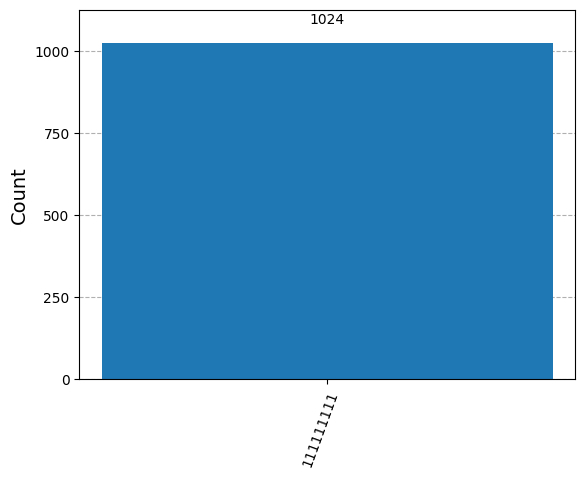

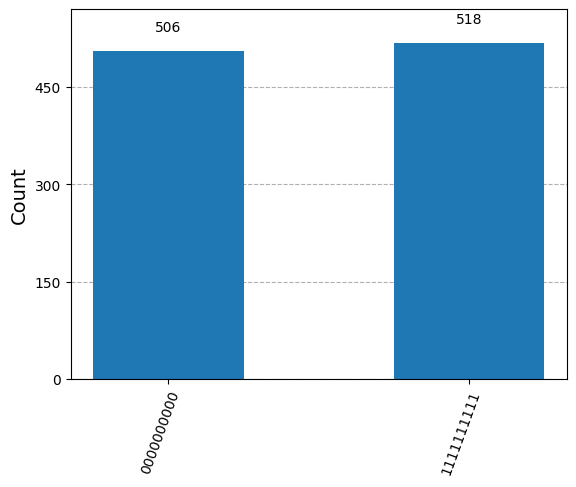

In [4]:
%matplotlib inline
from qiskit.visualization import circuit_drawer,plot_histogram
import matplotlib
import matplotlib.pyplot as plt
#matplotlib.use("TkAgg")
for ckt, probs in result_dict_qasm.items():
    print(ckt) 
    plot_histogram(probs).show()